In [237]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
BATCH_SIZE = 32
MAX_EPOCHS = 20

In [239]:
zip_path = tf.keras.utils.get_file(
 origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

In [240]:
df = pd.read_csv(csv_path)
df = df[5::6] # make hourly
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [241]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [242]:
wv = df['wv (m/s)']
wv_bad = wv == -9999.00
wv[wv_bad] = 0.0

max_wv = df['max. wv (m/s)']
max_wv_bad = max_wv == -9999.00
max_wv[max_wv_bad] = 0.0

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


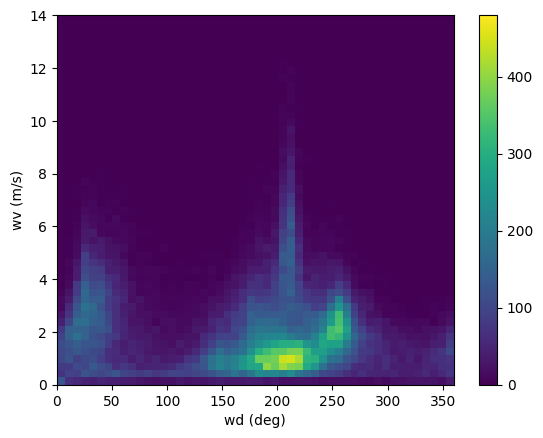

In [243]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('wd (deg)')
plt.ylabel('wv (m/s)')
plt.show()

In [244]:
wv = df.pop('wv (m/s)')
wv_max = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)')*np.pi/180.0

df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = wv*np.cos(wd_rad)
df['max Wy'] = wv*np.sin(wd_rad)

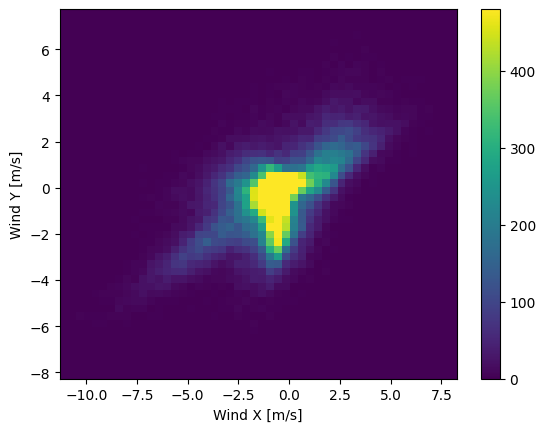

In [245]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

In [246]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [247]:
column_indices = {colname:i for i, colname in enumerate(df.columns)}

n = len(df)
train_df = df[:int(n*0.7)] # 70% train
val_df = df[int(n*0.7):int(n*0.9)] # 20% val
test_df = df[int(n*0.9):] # 10% test

num_features = df.shape[1]

print(f'train: {train_df.shape}\tval: {val_df.shape}\ttest: {test_df.shape}')

train: (49063, 19)	val: (14018, 19)	test: (7010, 19)


In [248]:
# normalizing with training set mean and standard deviation. !! this is not 100% clean -> since it's a time series, taking the mean over 
# the entire training dataset brings information from the future (end of the time series) into the past (start of the time series). however,
# because we've already taken away val and test datasets, this is not 'entirely dishonest' ;) 
train_mean = train_df.mean(axis=0)
train_sd = train_df.std(axis=0)

train_df = (train_df - train_mean) / train_sd
val_df = (val_df - train_mean) / train_sd
test_df = (test_df - train_mean) / train_sd

C:\Users\robet\AppData\Local\Temp\ipykernel_17900\2188831089.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


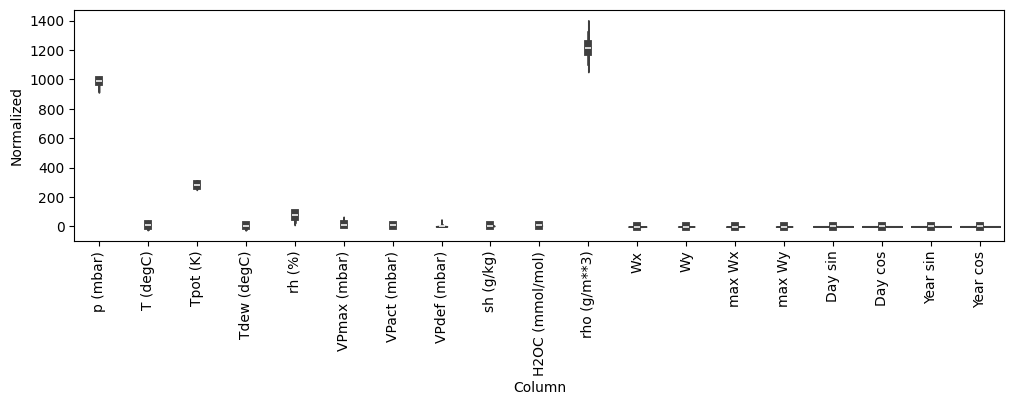

In [249]:
df_melted = df.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 3))
ax = sns.violinplot(x='Column', y='Normalized', data=df_melted)
_ = ax.set_xticklabels(df.keys(), rotation=90)

C:\Users\robet\AppData\Local\Temp\ipykernel_17900\2790111085.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


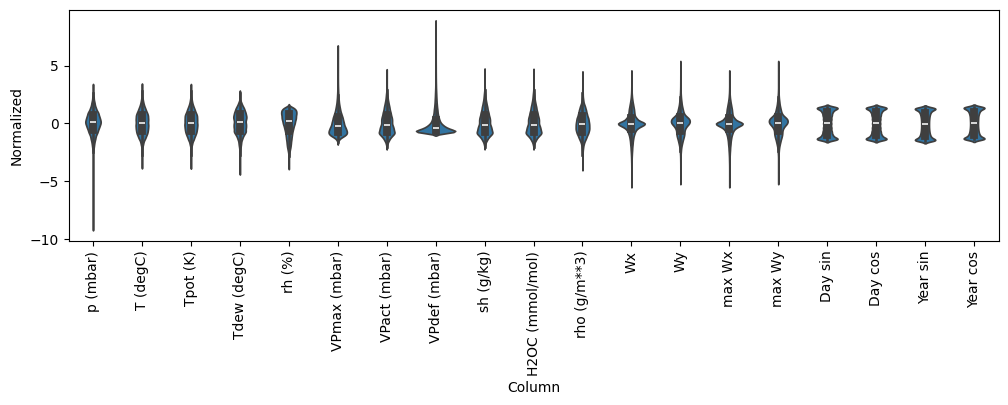

In [250]:
df_normalized = (df - train_mean) / train_sd
df_normalized = df_normalized.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 3))
ax = sns.violinplot(x='Column', y='Normalized', data=df_normalized)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [251]:
class WindowGenerator:


    def __init__(self, input_width, label_width, offset, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.offset = offset

        self.total_window_size = input_width + offset

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None) # None -> slice goes until end of iterable on which it's used
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]


    def __repr__(self):
        return '\n'.join([
            f'Total window size = {self.total_window_size}',
            f'Input indices = {self.input_indices}',
            f'Label indices = {self.label_indices}',
            f'Label columns = {self.label_columns}'
        ])


    def split_window(self, features):
        
        # (1st dimension is batch, 2nd is timestep, 3rd is variable)
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.label_slice, :]
        
        # keep only desired output columns
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels


    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        
        inputs, labels = self.example
        
        plt.figure(figsize=(12, 5))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(
                self.input_indices, 
                inputs[n, :, plot_col_index],
                label='Inputs', 
                marker='.', 
                zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(
                self.label_indices, 
                labels[n, :, label_col_index],
                edgecolors='k', 
                label='Labels', 
                c='#2ca02c', 
                s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices, 
                    predictions[n, :, label_col_index],
                    marker='X', 
                    edgecolors='k', 
                    label='Predictions',
                    c='#ff7f0e', 
                    s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')


    def make_dataset(self, data):
        data = np.array(data, dtype=float)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=BATCH_SIZE
        )

        ds = ds.map(self.split_window)

        return ds
    

    @property
    def train_ds(self):
        return self.make_dataset(self.train_df)
    

    @property
    def val_ds(self):
        return self.make_dataset(self.val_df)
    

    @property
    def test_ds(self):
        return self.make_dataset(self.test_df)
    

    @property
    def example(self):
        return next(iter(self.test_ds))

In [252]:
w = WindowGenerator(input_width=24*10, label_width=24, offset=24, label_columns=['T (degC)'])

example_window = tf.stack(
    [np.array(train_df[:w.total_window_size]),
    np.array(train_df[10:10 + w.total_window_size]),
    np.array(train_df[20:20 + w.total_window_size])
])

example_inputs, example_labels = w.split_window(example_window)

print(example_inputs.shape)
print(example_labels.shape)

(3, 240, 19)
(3, 24, 1)


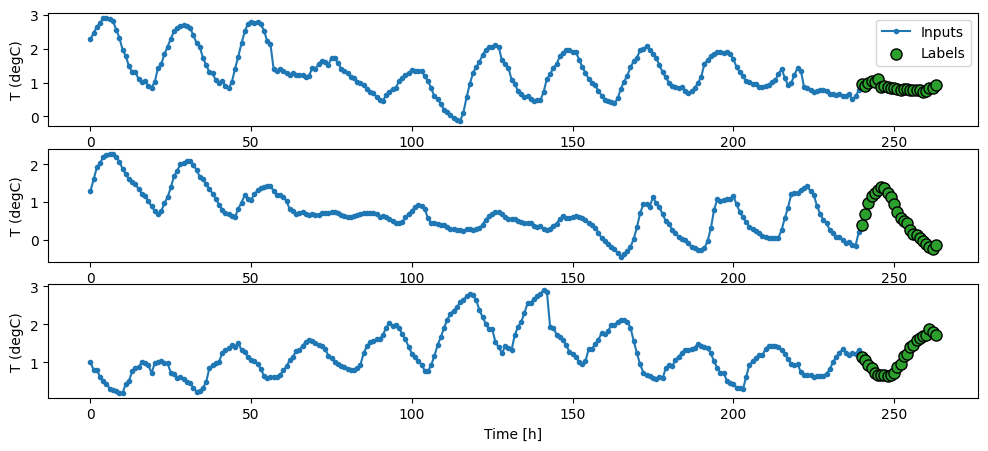

In [253]:
w.plot()

In [254]:
for inputs, labels in w.train_ds.take(1):
    print(inputs.shape, labels.shape)

(32, 240, 19) (32, 24, 1)


### **Compare multiple models**

In [255]:
def compile_and_fit(model, window, patience=2):
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min'
    )

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )


    history = model.fit(
        window.train_ds,
        validation_data=window.val_ds,
        epochs=MAX_EPOCHS,
        callbacks=[early_stopping]
    )

    return history

In [256]:
val_performance = {}
performance = {}

##### **Single-output-step- single-output feature model - naïve baseline model $x(t) = x(t-1)$**

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0851
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0128 - mean_absolute_error: 0.0784


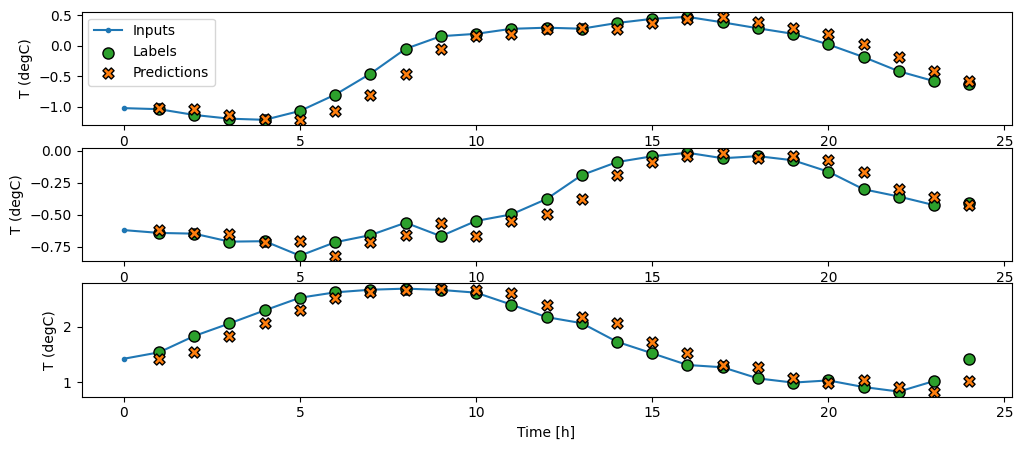

In [257]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index] # this returns a 2d tensor because we're selecting all batches and timesteps of one feature
        return result[:, :, tf.newaxis] # this restores the 3d shape by adding a singleton dimension as the last axis


baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

performance['Baseline'] = baseline.evaluate(w_wide.test_ds, return_dict=True)
val_performance['Baseline'] = baseline.evaluate(w_wide.val_ds, return_dict=True)

w_wide.plot(baseline)

##### **Single-output-step- single-output feature model - linear model, single-lag $x(t) = f(x(t-1))$**

In [258]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_wide.example[0].shape}')
print(f'output shape = {linear(w_wide.example[0]).shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)


In [259]:
history = compile_and_fit(linear, w_wide)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1323 - mean_absolute_error: 0.2441 - val_loss: 0.0100 - val_mean_absolute_error: 0.0741
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0097 - mean_absolute_error: 0.0722 - val_loss: 0.0086 - val_mean_absolute_error: 0.0680
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0692 - val_loss: 0.0086 - val_mean_absolute_error: 0.0678
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0691 - val_loss: 0.0086 - val_mean_absolute_error: 0.0681
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0691 - val_loss: 0.0086 - val_mean_absolute_error: 0.0681


In [260]:
val_performance['Linear'] = linear.evaluate(w_wide.val_ds, return_dict=True)
performance['Linear'] = linear.evaluate(w_wide.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0679
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0661


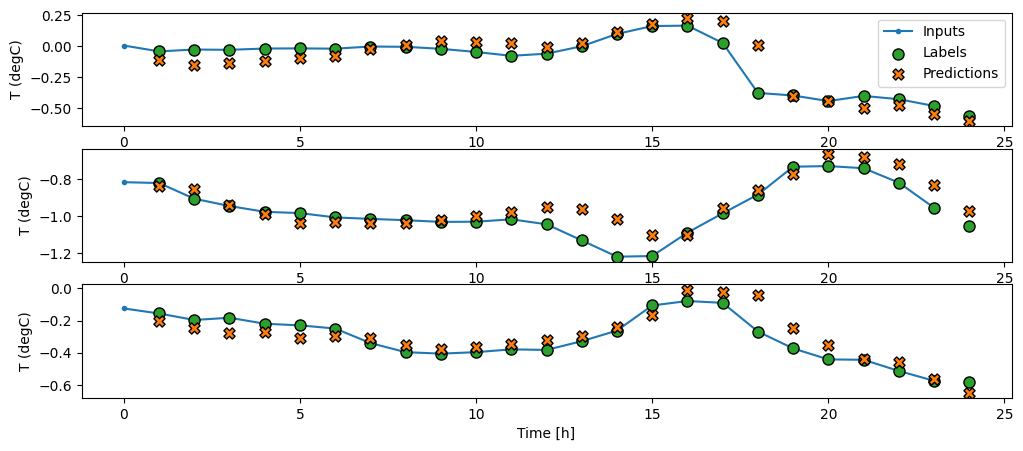

In [264]:
w_wide.plot(linear)

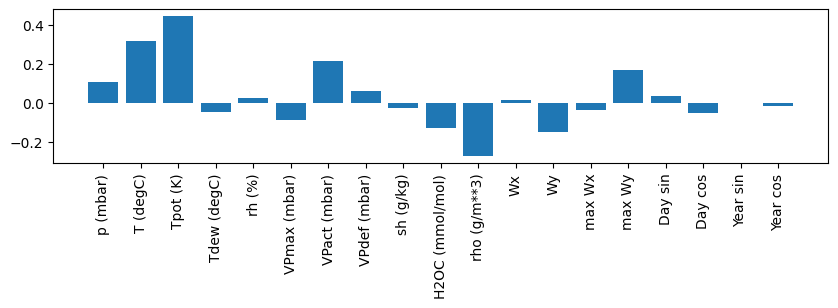

In [284]:
weights = linear.layers[0].kernel[:, 0].numpy()
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(x=range(len(train_df.columns)), height= weights)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels(train_df.columns, rotation=90)
plt.show()

##### **Single-output-step- single-output feature model - dense model, single-lag $x(t) = f(x(t-1))$**

In [360]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_wide.example[0].shape}')
print(f'output shape = {linear(w_wide.example[0]).shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)


In [361]:
history = compile_and_fit(dense, w_wide)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.1132 - val_loss: 0.0070 - val_mean_absolute_error: 0.0604
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0579 - val_loss: 0.0066 - val_mean_absolute_error: 0.0569
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0561 - val_loss: 0.0065 - val_mean_absolute_error: 0.0564
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0552 - val_loss: 0.0066 - val_mean_absolute_error: 0.0572
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0548 - val_loss: 0.0066 - val_mean_absolute_error: 0.0574


In [362]:
val_performance['Dense'] = dense.evaluate(w_wide.val_ds, return_dict=True)
performance['Dense'] = dense.evaluate(w_wide.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0066 - mean_absolute_error: 0.0575
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0572


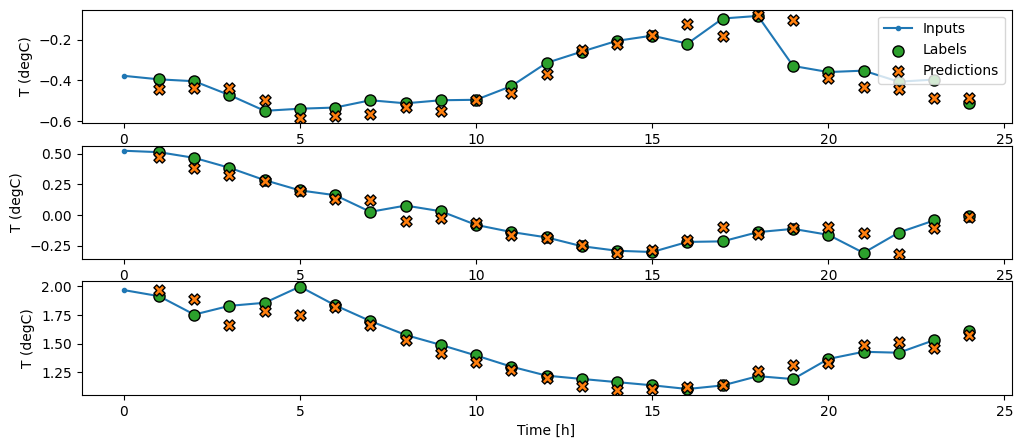

In [363]:
w_wide.plot(dense)

##### **Single-output-step- single-output feature model - dense model, multi-lag $x(t) = f(x(t-1), x(t-2), ... x(t-h))$**